Importing the dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

Reading the data

In [2]:
movie_data = pd.read_csv("/content/IMDb Movies India.csv", encoding="ISO-8859-1")

In [3]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
movie_data.shape

(15509, 10)

In [6]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
movie_data['Rating'].value_counts()

6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64

In [9]:
movie = movie_data.dropna(subset=['Rating'])

In [10]:
movie.shape

(7919, 10)

Printing the first 10 rows from the dataset

In [11]:
movie.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [12]:
movie.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [13]:
movie['Genre'].fillna(movie['Genre'].mode()[0], inplace=True)
movie['Actor 1'].fillna(movie['Actor 1'].mode()[0], inplace=True)
movie['Actor 2'].fillna(movie['Actor 2'].mode()[0], inplace=True)
movie['Actor 3'].fillna(movie['Actor 3'].mode()[0], inplace=True)

<ipython-input-13-7f53e2e6a363>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Genre'].fillna(movie['Genre'].mode()[0], inplace=True)
<ipython-input-13-7f53e2e6a363>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Actor 1'].fillna(movie['Actor 1'].mode()[0], inplace=True)
<ipython-input-13-7f53e2e6a363>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Actor 2'].fillna(movie['Actor 2'].mode()[0], inplace=True)
<i

In [14]:
movie['Director'].fillna(movie['Director'].mode()[0], inplace=True)


<ipython-input-14-705d8854d487>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Director'].fillna(movie['Director'].mode()[0], inplace=True)


In [15]:
movie.isnull().sum()

Name           0
Year           0
Duration    2068
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [16]:
unique_rating = movie['Rating'].unique()
unique_vote = movie['Votes'].unique()
unique_genre = movie['Genre'].unique()

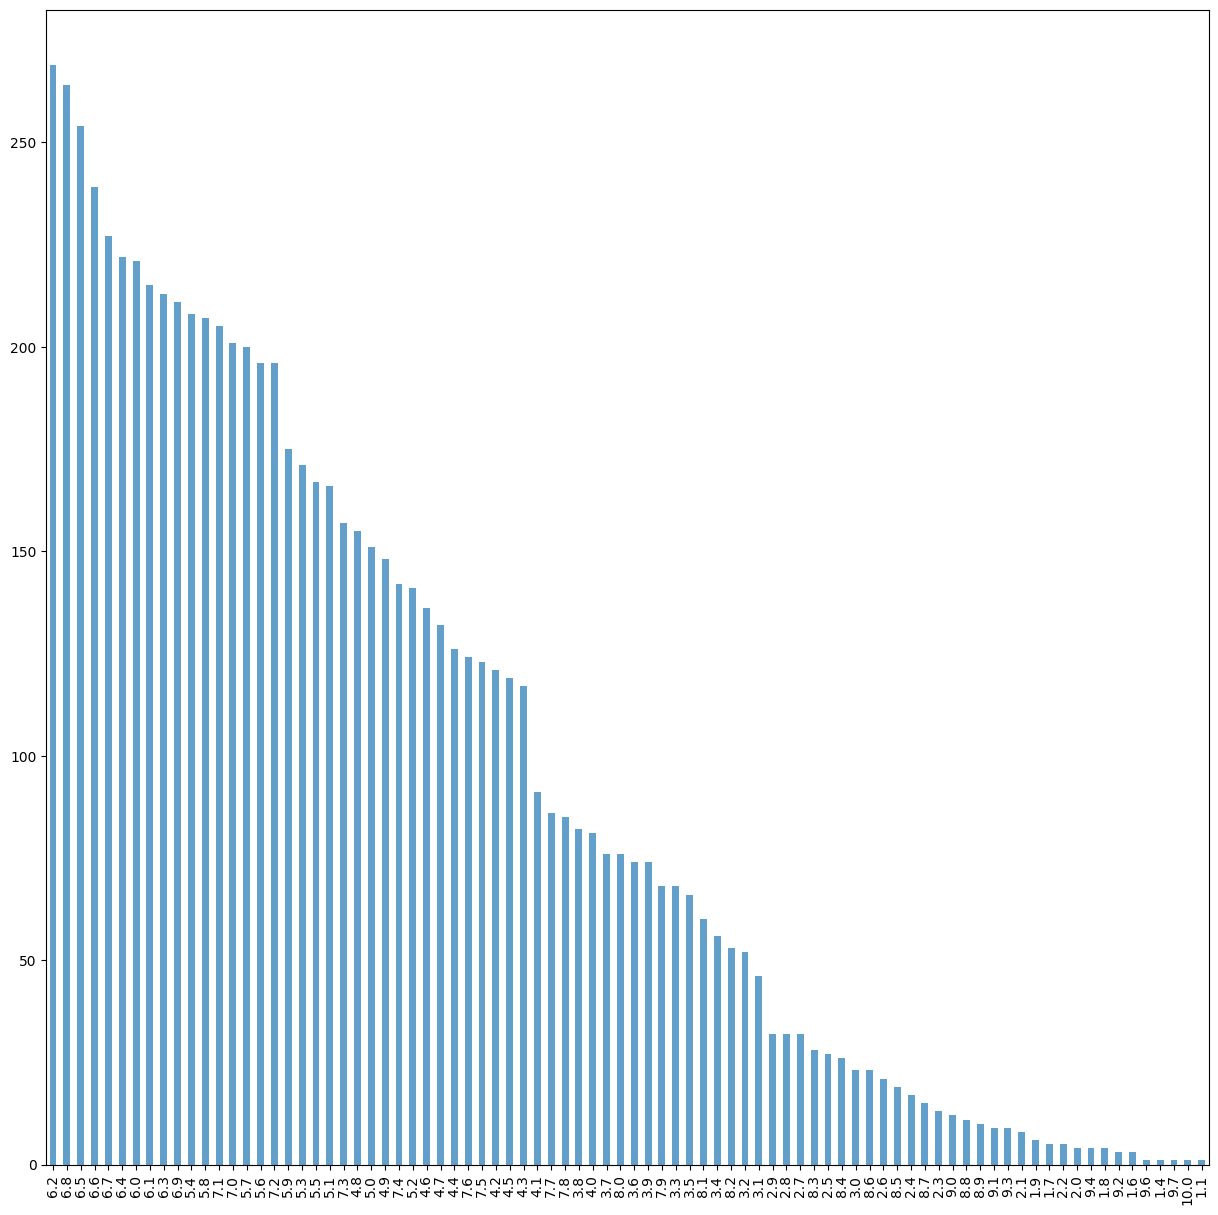

In [17]:
movie['Rating'].value_counts().plot(kind='bar',alpha=0.7,figsize=(15,15))
plt.show()

<ipython-input-18-efa42d131660>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Movies', y='Actor', data=actor_cnt.head(5), palette='viridis')


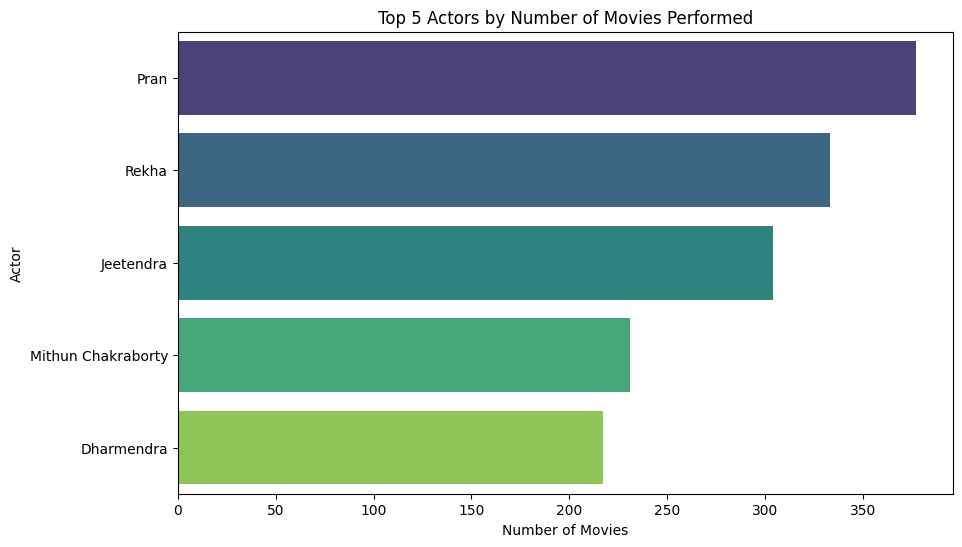

In [18]:
actors = pd.concat([movie['Actor 1'], movie['Actor 2'], movie['Actor 3']])
actor_cnt = actors.value_counts().reset_index()
actor_cnt.columns = ['Actor', 'Number of Movies']
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Movies', y='Actor', data=actor_cnt.head(5), palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 5 Actors by Number of Movies Performed')
plt.show()

In [19]:
movie['Genre'] = movie['Genre'].astype('category')
movie['Genre'] = movie['Genre'].cat.codes
movie['Director'] = movie['Director'].astype('category')
movie['Director'] = movie['Director'].cat.codes
movie['Actor 1'] = movie['Actor 1'].astype('category')
movie['Actor 1'] = movie['Actor 1'].cat.codes
movie['Actor 2'] = movie['Actor 2'].astype('category')
movie['Actor 2'] = movie['Actor 2'].cat.codes
movie['Actor 3'] = movie['Actor 3'].astype('category')
movie['Actor 3'] = movie['Actor 3'].cat.codes

<ipython-input-19-974b335ddcc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Genre'] = movie['Genre'].astype('category')
<ipython-input-19-974b335ddcc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Genre'] = movie['Genre'].cat.codes
<ipython-input-19-974b335ddcc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [20]:
movie.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,268,7.0,8,811,1782,2814,377
3,#Yaaram,(2019),110 min,207,4.4,35,1749,1589,890,2572
5,...Aur Pyaar Ho Gaya,(1997),147 min,177,4.7,827,2005,508,85,2449
6,...Yahaan,(2005),142 min,331,7.4,"1,086",2643,931,1388,3029
8,?: A Question Mark,(2012),82 min,367,5.6,326,174,2520,1461,1205
9,@Andheri,(2014),116 min,37,4.0,11,519,398,698,567
10,1:1.6 An Ode to Lost Love,(2004),96 min,268,6.2,17,1409,1786,772,431
11,1:13:7 Ek Tera Saath,(2016),120 min,362,5.9,59,335,1512,252,940
12,100 Days,(1991),161 min,370,6.5,983,1804,870,1234,1028
13,100% Love,(2012),166 min,179,5.7,512,1977,918,1117,2687


In [21]:
movie['Year'] = movie['Year'].astype(str)
movie['Duration'] = movie['Duration'].astype(str)
movie['Year'] = movie['Year'].str.extract('(\d+)').astype(float)
movie['Duration'] = movie['Duration'].str.extract('(\d+)').astype(float)
movie['Votes'] = movie['Votes'].str.extract('(\d+)').astype(float)

<ipython-input-21-cd1afe85b071>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Year'] = movie['Year'].astype(str)
<ipython-input-21-cd1afe85b071>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['Duration'] = movie['Duration'].astype(str)
<ipython-input-21-cd1afe85b071>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [22]:
X = movie.drop(columns=['Name','Year','Duration','Rating'], axis=1)
Y = movie['Rating']

In [23]:
print(X)

       Genre  Votes  Director  Actor 1  Actor 2  Actor 3
1        268    8.0       811     1782     2814      377
3        207   35.0      1749     1589      890     2572
5        177  827.0      2005      508       85     2449
6        331    1.0      2643      931     1388     3029
8        367  326.0       174     2520     1461     1205
...      ...    ...       ...      ...      ...      ...
15501     28  135.0       500      631     1436      868
15503     28   44.0      2339      550      936     2014
15504      0   11.0      1418     1405     2536     2725
15505     38  655.0      1338      145     2670      371
15508     38   20.0      1171      631      934      355

[7919 rows x 6 columns]


In [24]:
print(Y)

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15501    5.3
15503    5.8
15504    4.6
15505    4.5
15508    6.2
Name: Rating, Length: 7919, dtype: float64


Train Test Split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [26]:
model = LinearRegression()

In [27]:
#training the model
model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [28]:
X_train_prediction = model.predict(X_train)

In [29]:
print(X_train_prediction)

[5.60415616 5.64218322 5.95557986 ... 6.02911006 5.75861182 5.93226369]


Evaluation metrics on Training data

In [30]:
mae = mean_absolute_error(Y_train, X_train_prediction)
rmse = mean_squared_error(Y_train, X_train_prediction, squared=False)
r2 = r2_score(Y_train, X_train_prediction)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error: 1.1019922613699997
Root Mean Squared Error: 1.3633899555620936
R-squared (R2) Score: 0.019367638536906928


Evaluation metrics on Test data

In [31]:
X_test_prediction = model.predict(X_test)

mae = mean_absolute_error(Y_test, X_test_prediction)
rmse = mean_squared_error(Y_test, X_test_prediction, squared=False)
r2 = r2_score(Y_test, X_test_prediction)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error: 1.1130583092565989
Root Mean Squared Error: 1.3791396761656438
R-squared (R2) Score: 0.016297855027637365
